# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to Logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    #url + "lat=" + lat_lngs[i](0) + "&lon=" +  lat_lngs[i](1) + "&appid=" + api_Key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"] ["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"] ["all"]
        city_wind = city_weather ["wind"] ["speed"]
        city_country = city_weather ["sys"] ["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city 
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | kudahuvadhoo
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | astrakhan
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | noumea
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | kone
Processing Record 12 of Set 1 | okha
Processing Record 13 of Set 1 | tuensang
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | midvagur
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | amos
Processing Record 18 of Set 1 | kandahar
Processing Record 19 of Set 1 | paranaiba
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,25.99,83,100,3.60,CC,1701731960
1,kudahuvadhoo,2.6708,72.8944,26.97,80,44,5.20,MV,1701731516
2,hamilton,39.1834,-84.5333,6.35,81,75,3.60,US,1701731654
3,port-aux-francais,-49.3500,70.2167,4.10,73,80,11.68,TF,1701731948
4,iskateley,67.6803,53.1512,-26.10,93,20,4.02,RU,1701731959


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,83,100,3.60,CC,1701731960
1,kudahuvadhoo,2.6708,72.8944,26.97,80,44,5.20,MV,1701731516
2,hamilton,39.1834,-84.5333,6.35,81,75,3.60,US,1701731654
3,port-aux-francais,-49.3500,70.2167,4.10,73,80,11.68,TF,1701731948
4,iskateley,67.6803,53.1512,-26.10,93,20,4.02,RU,1701731959


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

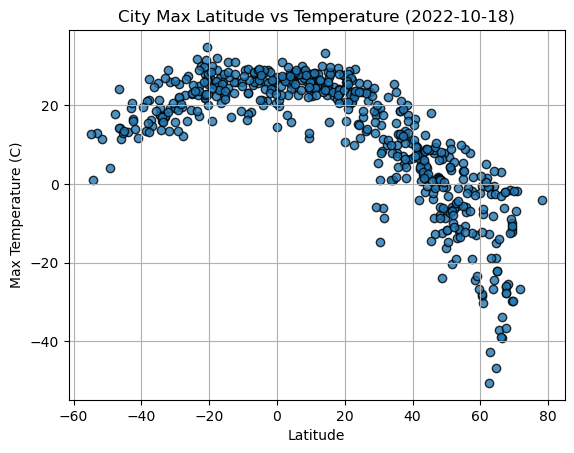

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

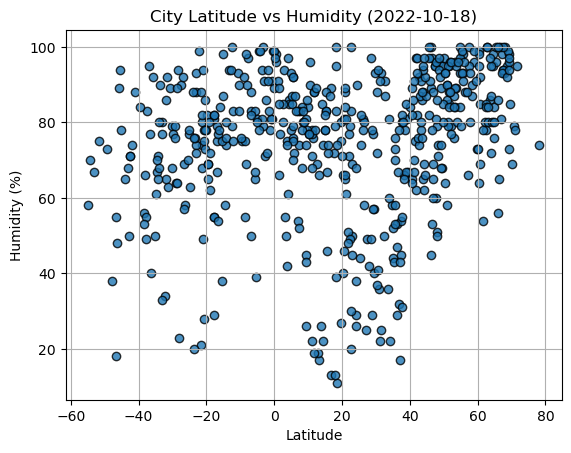

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

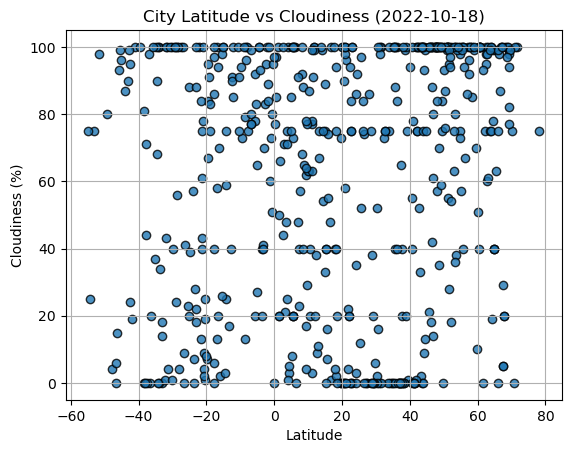

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)") 
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

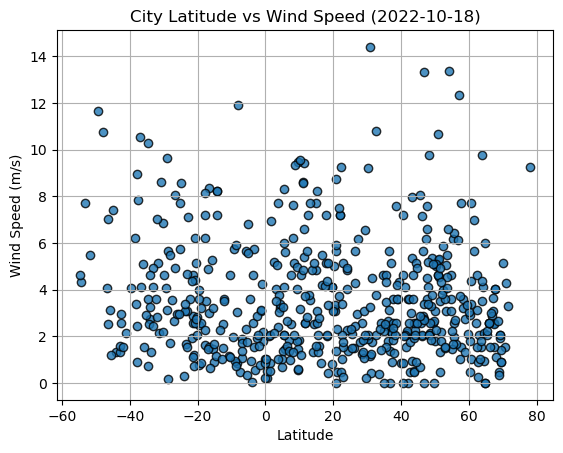

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha= 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def create_linear_regression(x_values, y_values, xlabel, ylabel, title, xline, yline):
    # Calculate the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create a scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

    # Plot the regression line and linear equation
    plt.plot(x_values, regress_values, color="red")
    plt.annotate(line_eq,(xline,yline),fontsize=15,color="red")

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the correlation coefficient on the plot
    print(f"The r-value is: {rvalue**2}")

    # Show the plot
    plt.show()


In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kudahuvadhoo,2.6708,72.8944,26.97,80,44,5.20,MV,1701731516
2,hamilton,39.1834,-84.5333,6.35,81,75,3.60,US,1701731654
4,iskateley,67.6803,53.1512,-26.10,93,20,4.02,RU,1701731959
6,astrakhan,46.3497,48.0408,7.93,100,100,2.00,RU,1701732020
10,okha,53.5739,142.9478,-11.87,89,38,5.49,RU,1701731828


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,83,100,3.60,CC,1701731960
3,port-aux-francais,-49.3500,70.2167,4.10,73,80,11.68,TF,1701731948
5,grytviken,-54.2811,-36.5092,1.02,70,25,4.31,GS,1701731947
7,noumea,-22.2763,166.4572,29.99,99,100,3.60,NC,1701732021
8,bredasdorp,-34.5322,20.0403,17.46,67,90,0.72,ZA,1701731449


The r-value is: 0.7318122043132477


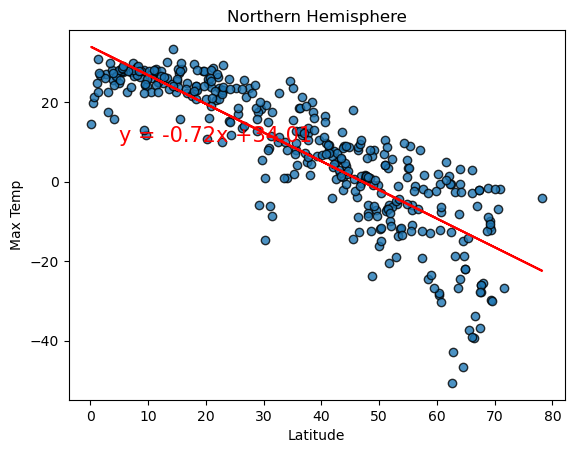

In [76]:
#Temperature vs. Latitude Linear Regression Plot

# Linear regression on Northern Hemisphere

create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp","Northern Hemisphere", 5,10) 


The r-value is: 0.40394556605192333


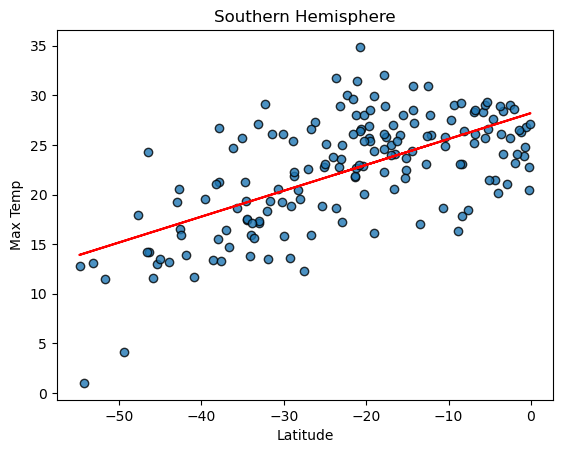

In [77]:
# Linear regression on Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Southern Hemisphere",5, 10)


**Discussion about the linear relationship:** In the southern hemisphere, as the latitude increases the distance from the equator decreases. As you move closer to the equator, the max temperature generally increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.105276620740848


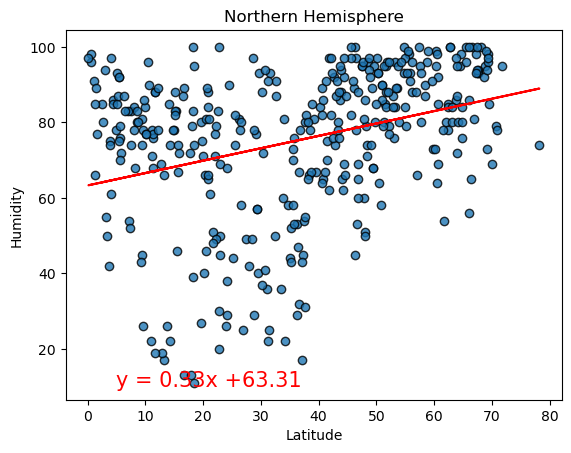

In [78]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Hemisphere", 5, 10)

The r-value is: 0.10935898244610674


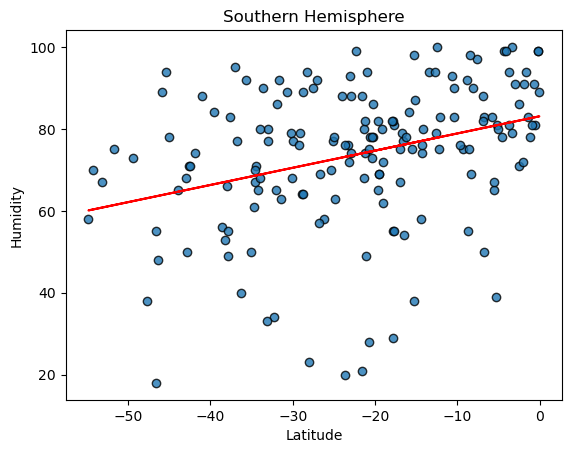

In [79]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Hemisphere", 5, 10)

**Discussion about the linear relationship:** The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06454955340896573


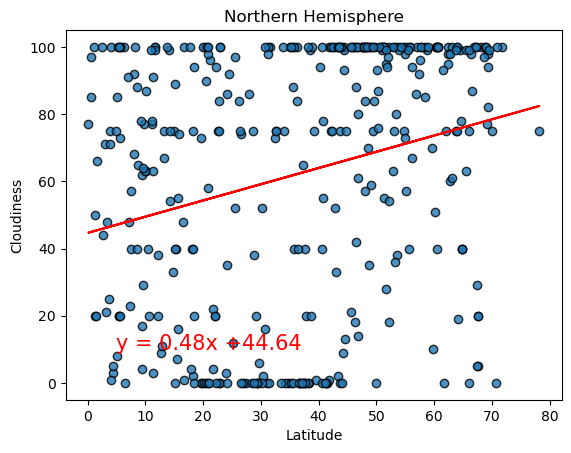

In [81]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere", 5, 10)

The r-value is: 0.025585378927099656


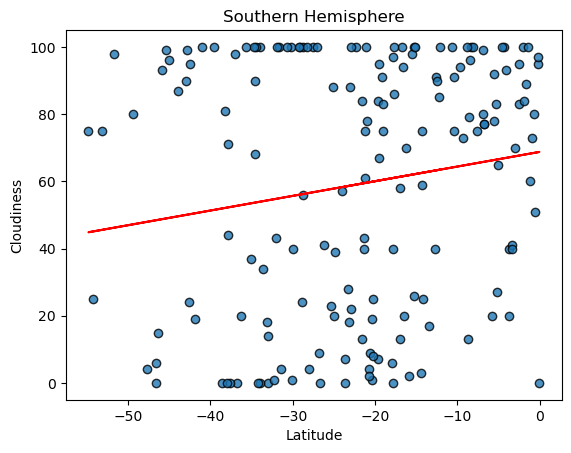

In [82]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere", 5, 10)

**Discussion about the linear relationship:** There does not appear to be a coorelation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003007435585087462


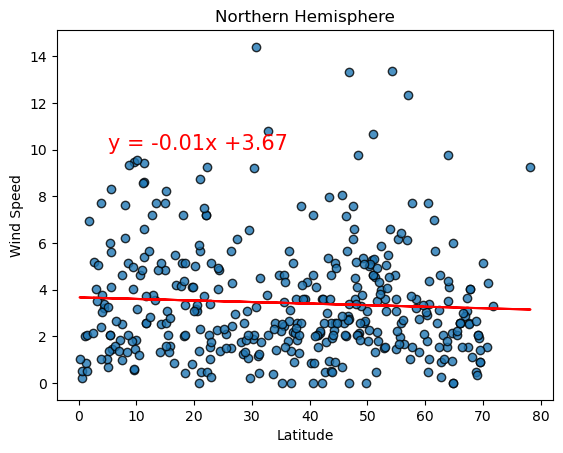

In [83]:
# Northern Hemisphere
create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere", 5, 10)

The r-value is: 0.08453861019522022


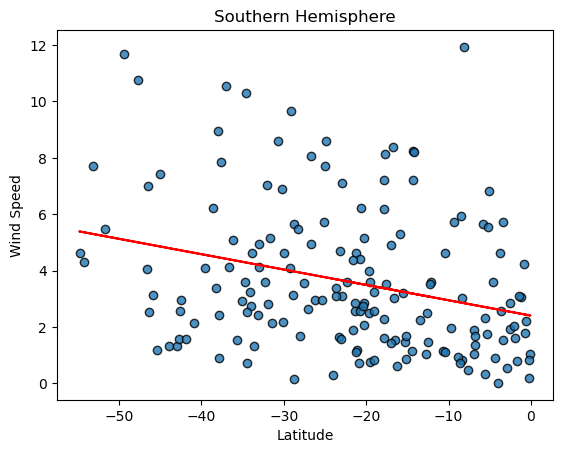

In [85]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Hemisphere", 5, 10)

**Discussion about the linear relationship:** There does not appear to be a coorelation between latitude and wind speed.